In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import shap

In [ ]:
# Load the dataset

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/DS4B/New York/new_york.csv")

# Display the first few rows of the dataset and summary information
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLO

In [ ]:
data

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [ ]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
data.LONG_NAME.nunique()

2731

In [ ]:
data.STREET_NAME.nunique()

174

In [ ]:
data.STREET_NAME.unique()

array(['East 55th Street', 'New York', 'Staten Island', 'Brooklyn',
       'Manhattan', 'Morrison Avenue', 'Midwood', 'Concourse Village',
       'Flushing', 'Elmhurst', 'Annadale', 'Queens', 'Fort Hamilton',
       'North Riverdale', 'Rego Park', 'Forest Hills', 'The Bronx',
       'Dongan Hills', 'Jackson Heights', 'Kings County', 'Clifton',
       'Mariners Harbor', 'Dyker Heights', 'Williamsburg', 'Concourse',
       'Mid Island', 'Centre Street', 'Cobble Hill', 'Richmond County',
       'Park Slope', 'Brighton Beach', 'Flatbush', 'Prospect Heights',
       'Woodhaven', 'Bedford-Stuyvesant', 'Jamaica', 'Spuyten Duyvil',
       'Bay Ridge', 'Shore Acres', 'Bayside', 'Glen Oaks',
       'Fresh Meadows', 'Highbridge', 'Sheepshead Bay', 'Rector Place',
       'Kew Gardens', 'Bushwick', 'Hudson Hill', 'Rosedale', 'East Bronx',
       'Parkchester', 'Borough Park', 'Brooklyn Heights', 'Little Haiti',
       'Canarsie', 'Kensington', 'East 110th Street', 'East New York',
       'Flatlands

In [ ]:
data.STATE.nunique()

308

In [ ]:

data.STATE.unique()

array(['New York, NY 10022', 'New York, NY 10019',
       'Staten Island, NY 10312', 'Manhattan, NY 10022',
       'New York, NY 10065', 'Brooklyn, NY 11238', 'New York, NY 10027',
       'Staten Island, NY 10304', 'Bronx, NY 10473', 'Brooklyn, NY 11230',
       'Bronx, NY 10451', 'Staten Island, NY 10303',
       'Jackson Heights, NY 11372', 'Elmhurst, NY 11373',
       'New York, NY 10014', 'Woodside, NY 11377', 'Brooklyn, NY 11209',
       'Bronx, NY 10471', 'Rego Park, NY 11374',
       'Staten Island, NY 10301', 'Forest Hills, NY 11375',
       'Bronx, NY 10465', 'Staten Island, NY 10307',
       'Briarwood, NY 11435', 'Queens, NY 11372', 'Brooklyn, NY 11214',
       'Staten Island, NY 10314', 'Brooklyn, NY 11207',
       'Brooklyn, NY 11219', 'Flushing, NY 11355', 'Brooklyn, NY 11249',
       'Bronx, NY 10453', 'Brooklyn, NY 11204', 'Woodhaven, NY 11421',
       'Jamaica, NY 11435', 'Manhattan, NY 10012', 'Flushing, NY 11358',
       'Richmond Hill South, NY 11419', 'New York, NY

In [ ]:
data.TYPE.unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

In [ ]:
data.BROKERTITLE.nunique()

1036

In [ ]:

data['ZIP_CODE'] = data['STATE'].str.extract(r'(\d+)$')  # This regex extracts the numbers at the end of the string

# Check the first few rows to ensure it worked correctly
print(data[['STATE', 'ZIP_CODE']].head())

                     STATE ZIP_CODE
0       New York, NY 10022    10022
1       New York, NY 10019    10019
2  Staten Island, NY 10312    10312
3      Manhattan, NY 10022    10022
4       New York, NY 10065    10065


In [ ]:
# Dropping redundant columns
#columns_to_drop = ['STATE', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'ADDRESS', 'STREET_NAME', 'LONG_NAME', 'BROKERTITLE', 'LATITUDE', 'LONGITUDE']

columns_to_drop = ['STATE', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'ADDRESS', 'LONG_NAME', 'BROKERTITLE', 'LATITUDE', 'LONGITUDE']
data = data.drop(columns=columns_to_drop)

# Display the first few rows to check the reduced dataset
data.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,SUBLOCALITY,STREET_NAME,ZIP_CODE
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan,East 55th Street,10022
1,Condo for sale,195000000,7,10.000000,17545.0,New York,New York County,New York,10019
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County,Staten Island,10312
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County,New York,10022
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County,New York,10065


In [ ]:
# Select categorical columns to encode
categorical_columns = ['TYPE','LOCALITY','SUBLOCALITY', 'STREET_NAME']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

label_encoder = LabelEncoder()
data['ZIP_CODE'] = label_encoder.fit_transform(data['ZIP_CODE'])

data.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,ZIP_CODE,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Condop for sale,TYPE_Contingent,TYPE_For sale,...,STREET_NAME_West 65th Street,STREET_NAME_West Brighton,STREET_NAME_West Bronx,STREET_NAME_Westchester Square,STREET_NAME_Whitestone,STREET_NAME_Williamsburg,STREET_NAME_Windsor Terrace,STREET_NAME_Woodhaven,STREET_NAME_Woodside,STREET_NAME_Woodstock
0,315000,2,2.000000,1400.0,18,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,195000000,7,10.000000,17545.0,16,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,260000,4,2.000000,2015.0,54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69000,3,1.000000,445.0,18,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55000000,7,2.373861,14175.0,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Normalization
X = data.drop('PRICE', axis=1)
y = data['PRICE']

# Initialize the scaler and scale X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled X back to DataFrame and directly add y to it
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df['PRICE'] = y

X_scaled_df.to_csv('new_york_cleaned.csv', index=False)

In [ ]:
#data = pd.read_csv('new_york_cleaned.csv')

X = X_scaled_df.drop(['PRICE'], axis = 1)
y = X_scaled_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.0005, 0.001, 0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best parameters:", grid_search.best_params_)
print("Best model:", grid_search.best_estimator_)

# Initialize the XGBoost regressor with the best parameters
best_model = xgb.XGBRegressor(
    colsample_bytree=grid_search.best_params_['colsample_bytree'],
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    subsample=grid_search.best_params_['subsample'],
    objective='reg:squarederror'
)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Calculate RMSE for the best model
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
print(f"Best Model RMSE: {rmse_best}")

# Calculate R-squared for the best model
r_squared_best = r2_score(y_test, y_pred_best)
print(f"Best Model R-squared: {r_squared_best}")

Fitting 3 folds for each of 675 candidates, totalling 2025 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.9}
Best model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Best Model RMSE: 3218761.2585200695
Best Model R-squared: 0.588

In [ ]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store feature importances along with corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 3 most important features
top_3_features = feature_importance_df.head(3)
print("Top 3 Most Important Features:")
print(top_3_features)


Top 3 Most Important Features:
                         Feature  Importance
41   SUBLOCALITY_Richmond County    0.801263
198    STREET_NAME_Staten Island    0.080219
2                   PROPERTYSQFT    0.074973


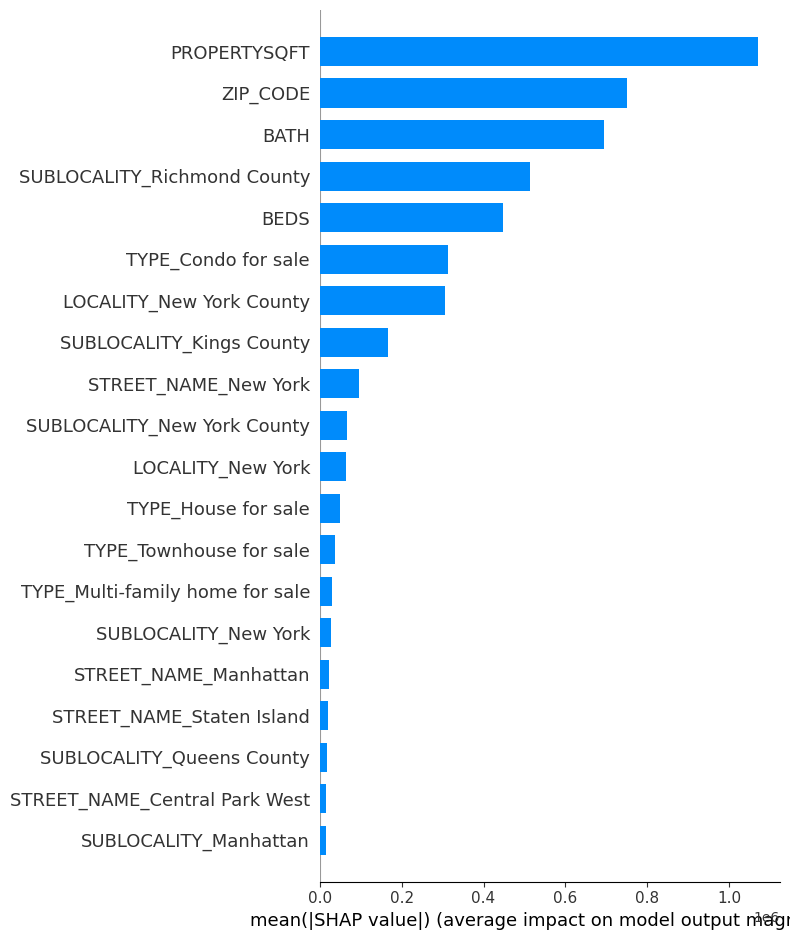

In [ ]:
import shap

# Create an explainer object using the trained XGBoost model
explainer = shap.Explainer(best_model, X_train)

# Calculate SHAP values for all observations in the test set
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
pip install shap